In [1]:
!pip install opencv-python-headless

  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.6 MB)


In [2]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import os

2024-05-26 14:22:48.871890: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def read_image(file_path):
    rgb_image = cv2.imread(file_path)
    return rgb_image

In [5]:
X = []
y = []

df = pd.read_csv('philarmonia_complete_features.csv')
dataset_path = "Philarmonia"
for index, row in tqdm(df.iterrows()):
    file_path = os.path.join(dataset_path + "/" + row["label"], row["filename"].split("\\")[-1].split(".")[0] + ".jpg").replace("\\", "/")
    try:
        image_rgb_matrix = read_image(file_path)
        image_rgb_matrix = image_rgb_matrix.astype('float32') / 255.0 # NORMALIZE RGB VALUES IN [0,1]
        label = row["label"]
        X.append(image_rgb_matrix)
        y.append(label)
    except:
        print("File error")
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

12060it [00:05, 2357.91it/s][ WARN:0@72.548] global loadsave.cpp:248 findDecoder imread_('Philarmonia/violin/violin_A3_1_forte_arco-normal.jpg'): can't open/read file: check file path/integrity
12529it [00:05, 2147.00it/s]

File error


13400it [00:05, 2133.18it/s][ WARN:0@73.209] global loadsave.cpp:248 findDecoder imread_('Philarmonia/violin/violin_Gs3_025_pianissimo_arco-normal.jpg'): can't open/read file: check file path/integrity
[ WARN:0@73.210] global loadsave.cpp:248 findDecoder imread_('Philarmonia/violin/violin_Gs3_025_piano_arco-col-legno-battuto.jpg'): can't open/read file: check file path/integrity
[ WARN:0@73.210] global loadsave.cpp:248 findDecoder imread_('Philarmonia/violin/violin_Gs3_025_piano_arco-normal.jpg'): can't open/read file: check file path/integrity
[ WARN:0@73.210] global loadsave.cpp:248 findDecoder imread_('Philarmonia/violin/violin_Gs3_025_piano_pizz-normal.jpg'): can't open/read file: check file path/integrity
[ WARN:0@73.221] global loadsave.cpp:248 findDecoder imread_('Philarmonia/violin/violin_Gs3_phrase_forte_arco-martele.jpg'): can't open/read file: check file path/integrity
[ WARN:0@73.221] global loadsave.cpp:248 findDecoder imread_('Philarmonia/violin/violin_Gs3_phrase_forte_ar

File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error
File error

In [6]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
len(labelencoder.classes_)

# To see the mapping, you can create a dictionary using the classes_ attribute
label_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))

print("Label Mapping:", label_mapping)

Label Mapping: {'banjo': 0, 'bass_clarinet': 1, 'bassoon': 2, 'cello': 3, 'clarinet': 4, 'contrabassoon': 5, 'cor_anglais': 6, 'double_bass': 7, 'flute': 8, 'french_horn': 9, 'guitar': 10, 'mandolin': 11, 'oboe': 12, 'percussion': 13, 'saxophone': 14, 'trombone': 15, 'trumpet': 16, 'tuba': 17, 'viola': 18, 'violin': 19}


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(10861, 130, 128, 3)
(10861,)
(2716, 130, 128, 3)
(2716,)


In [9]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(130, 128, 3))
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[-25:]:
    layer.trainable = True

model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(20, activation='softmax')
    ])
optimizer = Adam(learning_rate=0.00001)
model.summary()
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
model.save('philarmonia_resnet.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 20)                5140      
                                                                 
Total params: 24,117,396
Trainable params: 10,519,828
Non-trainable params: 13,597,568
_________________________________

2024-05-26 14:26:00.955836: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2168724480 exceeds 10% of free system memory.


340/340 [==============================] - 294s 851ms/step - loss: 2.0019 - accuracy: 0.4147 - val_loss: 1.7935 - val_accuracy: 0.5692
Epoch 2/10
340/340 [==============================] - 261s 768ms/step - loss: 1.0352 - accuracy: 0.7198 - val_loss: 0.7657 - val_accuracy: 0.7934
Epoch 3/10
340/340 [==============================] - 254s 748ms/step - loss: 0.6243 - accuracy: 0.8374 - val_loss: 0.5015 - val_accuracy: 0.8667
Epoch 4/10
340/340 [==============================] - 255s 749ms/step - loss: 0.4267 - accuracy: 0.8931 - val_loss: 0.3731 - val_accuracy: 0.8943
Epoch 5/10
340/340 [==============================] - 266s 782ms/step - loss: 0.3321 - accuracy: 0.9135 - val_loss: 0.2809 - val_accuracy: 0.9168
Epoch 6/10
340/340 [==============================] - 267s 784ms/step - loss: 0.2524 - accuracy: 0.9359 - val_loss: 0.2176 - val_accuracy: 0.9426
Epoch 7/10
340/340 [==============================] - 265s 780ms/step - loss: 0.2027 - accuracy: 0.9479 - val_loss: 0.1918 - val_accura

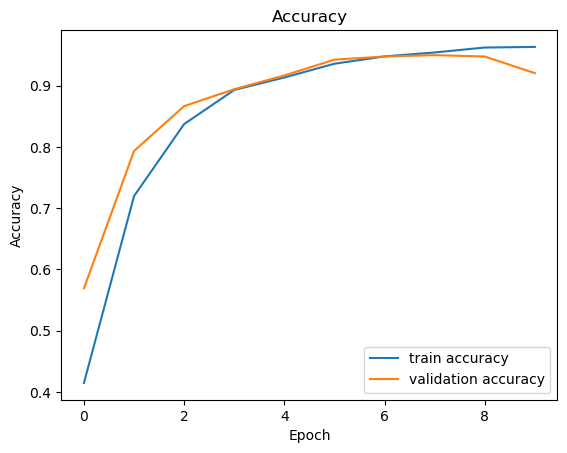

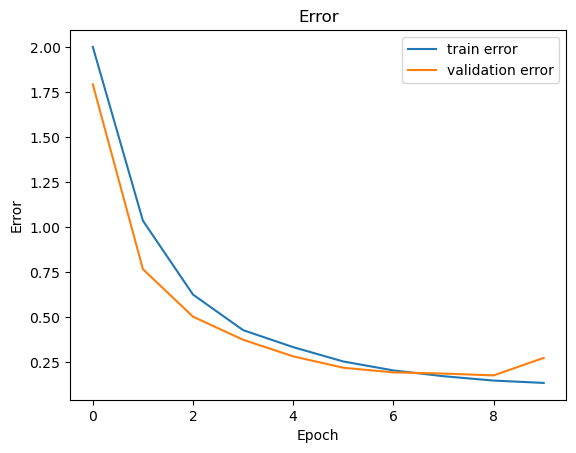

In [11]:
from matplotlib import pyplot as plt
plt.figure(1)
plt.plot(history.history["accuracy"], label="train accuracy")
plt.plot(history.history["val_accuracy"], label="validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(loc="lower right")
plt.title("Accuracy")
plt.savefig("phil_rn50_acc.png")
plt.show()

plt.figure(2)
plt.plot(history.history["loss"], label="train error")
plt.plot(history.history["val_loss"], label="validation error")
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.title("Error")
plt.savefig("phil_rn50_loss.png")
plt.show()